# Example from Aj.Noraset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]}")
plt.show()

<Figure size 1400x500 with 3 Axes>

# AUTOMPG
## Sunat Praphanwong 6088130 Sec 1

### Download csv file by using wget library

In [3]:
import wget
link = 'https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv'
file = wget.download(link)

100% [..............................................................................] 10118 / 10118

In [16]:
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
df.head()
df.dropna(axis=0, inplace=True)

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [18]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [19]:
X.shape

(396, 6)

### SK.LEARN find MSE

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(
    PolynomialFeatures(degree=1),
    preprocessing.StandardScaler(),
    LinearRegression())
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

MSE: -13.73 (+/- 17.47)


In [21]:
scores

array([ -9.43577897, -10.56031257, -12.42265705,  -8.20210913,
        -5.81413328,  -6.25964982, -19.05078805, -11.80880036,
       -37.03404272, -16.6773709 ])

### LinearRegression Polynomial

,mean,std
degree=1,1.589711e+01,9.273790e+00
degree=2,4.693265e+01,5.826257e+01
degree=3,3.833355e+01,2.808122e+01
degree=4,3.091366e+04,6.690112e+04
degree=5,2.108631e+08,4.674260e+08


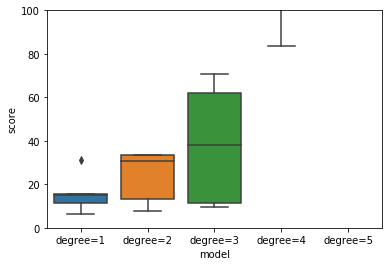

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
import seaborn as sns

scores = pd.DataFrame(index=list(range(5)))

for d in range(1, 6):
    model1 = make_pipeline(
        PolynomialFeatures(degree=d),
        preprocessing.StandardScaler(),
        LinearRegression())
    scores[f'degree={d}'] = -1 * cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')

fig, ax = plt.subplots()
b = pd.melt(scores, value_name='score', var_name='model')
__ = sns.boxplot(x='model', y='score', data=b, ax=ax)
ax.set_ylim(bottom=0, top=100)
scores.describe().loc[['mean', 'std']].transpose()

In [23]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


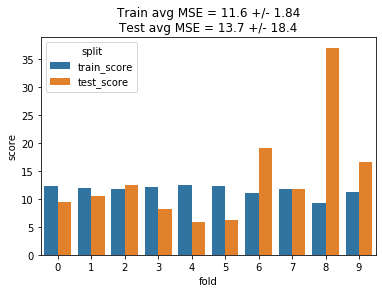

In [24]:
model = make_pipeline(
    PolynomialFeatures(degree=1),
    preprocessing.StandardScaler(),
    LinearRegression())
scores = cross_validate(
    model, X, y, cv=10, 
    scoring='neg_mean_squared_error',
    return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_score'] = a['test_score'] * -1
a['train_score'] = a['train_score'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
sns.barplot(
    x='fold', y='score', hue='split',
    hue_order=['train_score', 'test_score'], data=b)
__ = plt.title((
    f'Train avg MSE = {a["train_score"].mean():.3} +/- {a["train_score"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_score"].mean():.3} +/- {a["test_score"].std() * 2:.3}'
    ))

In [25]:
scores

{'fit_time': array([0.00498676, 0.00398898, 0.00299215, 0.00299311, 0.00302434,
        0.00299382, 0.00299287, 0.00199223, 0.00199294, 0.00298762]),
 'score_time': array([0.00099874, 0.00099754, 0.00099707, 0.00102448, 0.00099254,
        0.00099778, 0.0339179 , 0.00099564, 0.00099754, 0.00096798]),
 'test_score': array([ -9.43577897, -10.56031257, -12.42265705,  -8.20210913,
         -5.81413328,  -6.25964982, -19.05078805, -11.80880036,
        -37.03404272, -16.6773709 ]),
 'train_score': array([-12.22441788, -11.92362215, -11.7472187 , -12.14312055,
        -12.39466495, -12.34591365, -11.06736841, -11.75218457,
         -9.33871562, -11.19608015])}

In [26]:
X

,cylinders,displacement,horsepower,weight,acceleration,model-year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


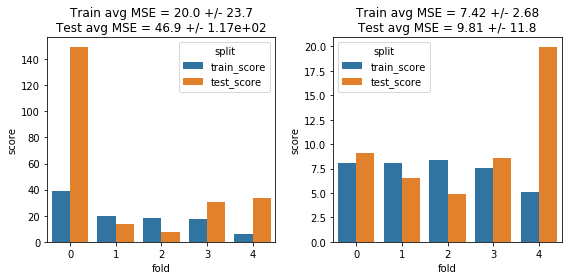

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge
import seaborn as sns

# Linear Regression
model = make_pipeline(PolynomialFeatures(degree=2),  preprocessing.StandardScaler(),  LinearRegression())
scores = cross_validate(model, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_score'] = a['test_score'] * -1
a['train_score'] = a['train_score'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
sns.barplot(x='fold', y='score', hue='split',hue_order=['train_score', 'test_score'], data=b, ax=axes[0])
axes[0].set_title(( f'Train avg MSE = {a["train_score"].mean():.3} +/- {a["train_score"].std() * 2:.3}\n'
                   f'Test avg MSE = {a["test_score"].mean():.3} +/- {a["test_score"].std() * 2:.3}' ))

# L2 Regularization (Ridge)
model = make_pipeline(PolynomialFeatures(degree=2),preprocessing.StandardScaler(),Ridge())
scores = cross_validate(model, X, y, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

a = pd.DataFrame(scores)
a['fold'] = a.index
a = a.drop(columns=['fit_time', 'score_time'])
a['test_score'] = a['test_score'] * -1
a['train_score'] = a['train_score'] * -1
b = pd.melt(a, id_vars='fold', var_name='split', value_name='score')
sns.barplot( x='fold', y='score', hue='split',hue_order=['train_score', 'test_score'], data=b, ax=axes[1])
__ = axes[1].set_title((    f'Train avg MSE = {a["train_score"].mean():.3} +/- {a["train_score"].std() * 2:.3}\n'
    f'Test avg MSE = {a["test_score"].mean():.3} +/- {a["test_score"].std() * 2:.3}' ))
plt.tight_layout()

,mean,std
d=4+l2,9.322959e+00,5.287867e+00
d=3+l2,9.405174e+00,5.432978e+00
d=2+l2,9.813583e+00,5.903396e+00
d=5+l2,1.028540e+01,5.983315e+00
d=1,1.589711e+01,9.273790e+00
d=1+l2,1.594790e+01,9.400589e+00
d=3,3.833355e+01,2.808122e+01
d=2,4.693265e+01,5.826257e+01
d=4,3.091366e+04,6.690112e+04
d=5,2.108631e+08,4.674260e+08


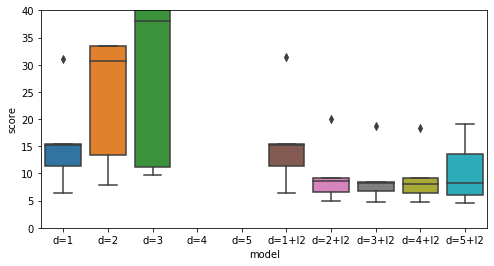

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

scores = pd.DataFrame(index=list(range(5)))

for d in range(1, 6):
    model1 = make_pipeline(
        PolynomialFeatures(degree=d),
        preprocessing.StandardScaler(),
        LinearRegression())
    scores[f'd={d}'] = -1 * cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')

for d in range(1, 6):
    model1 = make_pipeline(
        PolynomialFeatures(degree=d),
        preprocessing.StandardScaler(),
        Ridge())
    scores[f'd={d}+l2'] = -1 * cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')

fig, ax = plt.subplots(figsize=(8, 4))
b = pd.melt(scores, value_name='score', var_name='model')
__ = sns.boxplot(x='model', y='score', data=b, ax=ax)
ax.set_ylim(bottom=0, top=40)
scores.describe().loc[['mean', 'std']].transpose().sort_values('mean')

In [18]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model-year        int64
dtype: object

In [19]:
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [20]:
df = df[df['horsepower'] != '?']

C:\Users\Sunat\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [21]:
df['horsepower'] = df['horsepower'].astype('float')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model-year        int64
dtype: object

In [22]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,23.517172,5.457071,193.650253,104.189394,2973.000000,15.555808,76.027778
std,7.834368,1.703511,104.422387,38.402030,847.690354,2.758295,3.696969
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.375000,4.000000,104.750000,75.000000,2225.250000,13.800000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,263.250000,125.000000,3610.000000,17.125000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [23]:
print("Presence of null values:" + str(df.isnull().values.any()))

Presence of null values:False


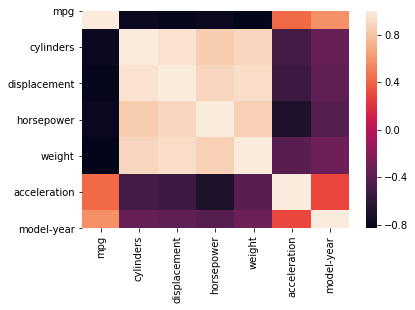

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr)
plt.show()

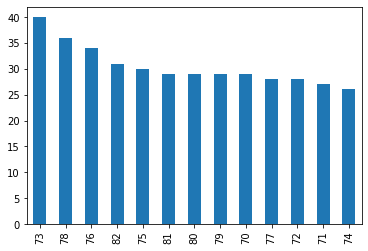

In [25]:
pd.value_counts(df['model-year']).plot.bar()

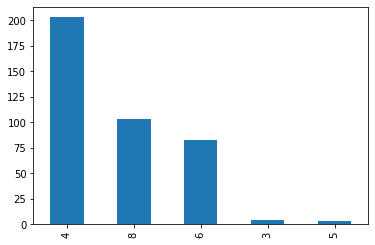

In [26]:
pd.value_counts(df['cylinders']).plot.bar()

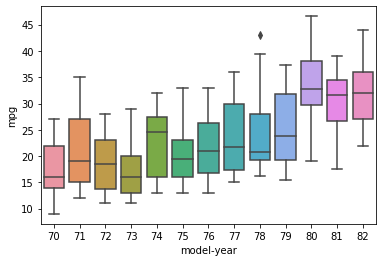

In [27]:
sns.boxplot(x = 'model-year', y = 'mpg', data = df)

In [28]:
print(len(df.index))

396


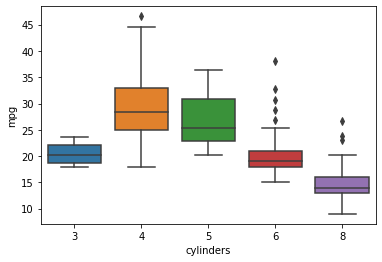

In [29]:
sns.boxplot(x = 'cylinders', y = 'mpg', data = df)

In [30]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(df, train_size=0.7,test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

training, valid = train_test_split(training, train_size = 0.7, test_size =0.3 )

training_label = training.pop('mpg')

test_label = test.pop('mpg')

valid_label = valid.pop('mpg')

In [31]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# instantiate training models
xgb = XGBRegressor()
dtc = DecisionTreeRegressor()
rfc = RandomForestRegressor()
knn = KNeighborsRegressor(n_neighbors=3)
# train the models
xgb.fit(training, training_label)
dtc.fit(training, training_label)
rfc.fit(training, training_label)
knn.fit(training, training_label)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [32]:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=3, p=2, weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [33]:
xgb_predict = xgb.predict(test)
dtc_predict = dtc.predict(test)
rfc_predict = rfc.predict(test)
knn_predict = knn.predict(test)

In [34]:
from sklearn.metrics import mean_squared_error
import math
accuracy = dict()
accuracy['XGBoost'] = math.sqrt(mean_squared_error(test_label, xgb_predict)) 
accuracy['DecisionTree'] = math.sqrt(mean_squared_error(test_label,dtc_predict))
accuracy['RandomForest'] = math.sqrt(mean_squared_error(test_label,rfc_predict))
accuracy['KNN'] = math.sqrt(mean_squared_error(test_label,knn_predict))
print(accuracy)

{'XGBoost': 3.3170775801783297, 'DecisionTree': 4.322960003663846, 'RandomForest': 3.0399356444979353, 'KNN': 3.776540688314488}


In [35]:
xgb_predict = xgb.predict(valid) 
dtc_predict = dtc.predict(valid) 
rfc_predict = rfc.predict(valid) 
knn_predict = knn.predict(valid)

accuracy['XGBoost'] = math.sqrt(mean_squared_error(valid_label,xgb_predict)) 
accuracy['DecisionTree'] = math.sqrt(mean_squared_error(valid_label,dtc_predict))
accuracy['RandomForest'] = math.sqrt(mean_squared_error(valid_label,rfc_predict))
accuracy['KNN'] = math.sqrt(mean_squared_error(valid_label,knn_predict))
print(accuracy)

{'XGBoost': 2.769706089665732, 'DecisionTree': 2.988370315549454, 'RandomForest': 2.7670228736556064, 'KNN': 4.482300583240543}


In [36]:
results = pd.DataFrame({'label mpg': valid_label,'prediction': xgb.predict(valid)})
results.head()

,label mpg,prediction
328,30.0,28.750978
62,13.0,13.506544
158,16.0,12.828619
388,26.0,31.233419
395,32.0,30.669067


,Algorithms,Percentage
0,XGBoost,2.769706
1,DecisionTree,2.988370
2,RandomForest,2.767023
3,KNN,4.482301


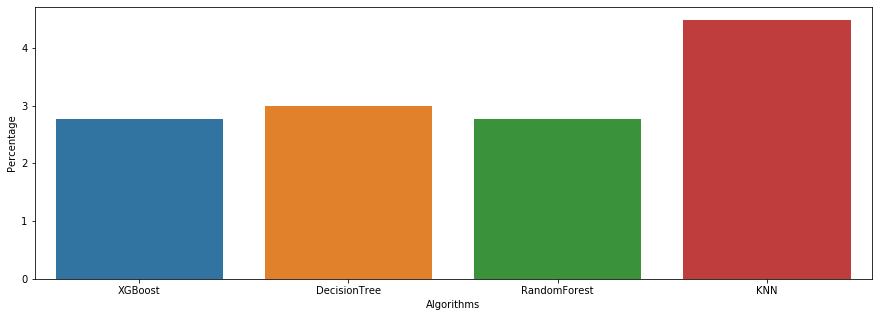

In [37]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(15,5))
new_df=pd.DataFrame(list(accuracy.items()),columns=['Algorithms','Percentage'])
display(new_df)
sns.barplot(x="Algorithms", y="Percentage", data=new_df,ax=ax1)

In [38]:
max_accuracy = min(accuracy,key=accuracy.get)
# max_accuracy'XGBoost'
print("max_accuracy is :",max_accuracy)

max_accuracy is : RandomForest
